# Capstone Project - Health Care

## Phase 3 - Predictive Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import metrics

In [2]:
df=pd.read_csv('Phase1_HealthCare.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1


## Data Preprocessing

In [3]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
Scale=StandardScaler()
x_train_std=Scale.fit_transform(x_train)
x_test_std=Scale.transform(x_test)

In [8]:
norm=lambda a:(a-min(a))/(max(a)-min(a))

In [9]:
df_norm=df.iloc[:,:-1]

In [10]:
df_normalized=df_norm.apply(norm)

In [11]:
x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(df_normalized.values,y,test_size=0.20,random_state=0)

In [12]:
print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(614, 8)
(154, 8)
(614,)
(154,)


Data is mostly numerical and in such scenario, found Logistic Regression shows good result. It is also found that  variables are depending on target somewhat linearly, So this is also good for Logistic Regression. Further, Support Vector Classifier, Perceptron Learning, Random Forest (Ensemble Learning) will be used to find improved accuracy. Note these learning algorithm also works on linear data very well. To validate model, train test split data will be used, for accuracy confusion matrix will be used because classes are balanced and also considering ROC Curve and ROC AUC Score to make sure Type 2 Error will not occur for Positive class, that is 1

## KNN

#### KNN With Standard Scaling

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model.fit(x_train_std,y_train)
knn_pred=knn_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of KNN Model::
0.8246753246753247

 Classification Report::
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       107
           1       0.75      0.64      0.69        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154
 


 ROC Curve


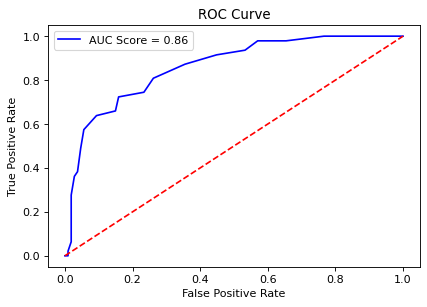

In [14]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')
print("\n","ROC Curve")
knn_prob=knn_model.predict_proba(x_test_std)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### KNN With Normalization

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_norm = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model_norm.fit(x_train_norm,y_train_norm)
knn_pred_norm=knn_model_norm.predict(x_test_norm)

Model Validation ==>

Accuracy Score of KNN Model with Normalization::
0.8181818181818182

 Classification Report::
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154
 


 ROC Curve


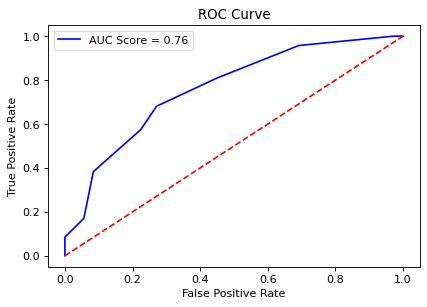

In [16]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model with Normalization::")
print(metrics.accuracy_score(y_test_norm,knn_pred_norm))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,knn_pred_norm),'\n')
print("\n","ROC Curve")
knn_prob_norm=knn_model.predict_proba(x_test_norm)
knn_prob_norm1=knn_prob_norm[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,knn_prob_norm1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### It is found that KNN with Standardization is better than Normalization, So later, models are build using Z Score Standardization and will compare with KNN

## Support Vectore Classifier

In [17]:
from sklearn.svm import SVC
svc_model_linear = SVC(kernel='linear',random_state=0,probability=True,C=0.01) 
svc_model_linear.fit(x_train_std,y_train)
svc_pred=svc_model_linear.predict(x_test_std)

Model Validation ==>

Accuracy Score of SVC Model with Linear Kernel::
0.8181818181818182

 Classification Report::
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154
 


 ROC Curve


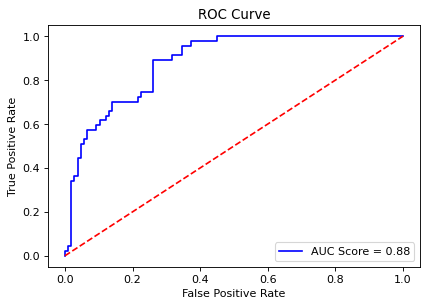

In [18]:
print("Model Validation ==>\n")
print("Accuracy Score of SVC Model with Linear Kernel::")
print(metrics.accuracy_score(y_test,svc_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,svc_pred),'\n')
print("\n","ROC Curve")
svc_prob_linear=svc_model_linear.predict_proba(x_test_std)
svc_prob_linear1=svc_prob_linear[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob_linear1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [19]:
from sklearn.svm import SVC
svc_model_rbf = SVC(kernel='rbf',random_state=0,probability=True,C=1) 
svc_model_rbf.fit(x_train_std,y_train)
svc_pred_rbf=svc_model_rbf.predict(x_test_std)

Model Validation ==>

Accuracy Score of SVC Model with RBF Kernel::
0.7792207792207793

 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.67      0.55      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154
 


 ROC Curve


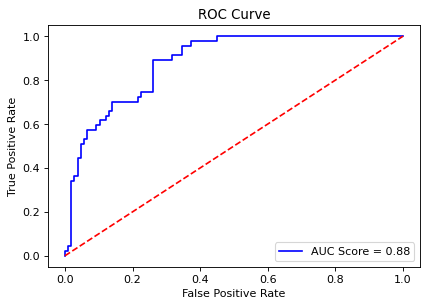

In [20]:
print("Model Validation ==>\n")
print("Accuracy Score of SVC Model with RBF Kernel::")
print(metrics.accuracy_score(y_test,svc_pred_rbf))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,svc_pred_rbf),'\n')
print("\n","ROC Curve")
svc_prob_rbf=svc_model_linear.predict_proba(x_test_std)
svc_prob_rbf1=svc_prob_rbf[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob_rbf1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### SVC with Linear Kernel is better than RBF Kernel, This was actually expected beause variables are somewhat depending linearly with outcome

#### Comparing with KNN

Both Models are working fine , but SVC Linear with C=0.01 is better in terms of AUC Score.

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.01) 
lr_model.fit(x_train_std,y_train)
lr_pred=lr_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.8116883116883117

 Classification Report::
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       107
           1       0.80      0.51      0.62        47

    accuracy                           0.81       154
   macro avg       0.81      0.73      0.75       154
weighted avg       0.81      0.81      0.80       154
 


 ROC Curve


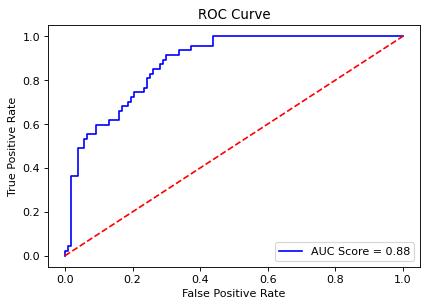

In [22]:
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,lr_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,lr_pred),'\n')
print("\n","ROC Curve")
lr_prob=lr_model.predict_proba(x_test_std)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

##### Accuracy of KNN is better than Logistic Regression,but auc score of Logistic regression is better

## Ensemble Learning(RF)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000,random_state=0)
rf_model.fit(x_train_std,y_train)
rf_pred=rf_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.8116883116883117

 Classification Report::
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154
 


 ROC Curve


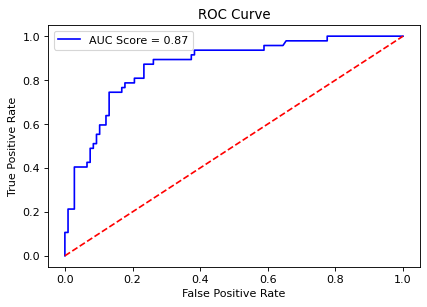

In [24]:
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,rf_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,rf_pred),'\n')
print("\n","ROC Curve")
rf_prob=rf_model.predict_proba(x_test_std)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

#### It is found that Random Forest Classifier is best among all, wondering AUC score is lesser by 1 than others also it is considered it to be best because balance of classes between Precision and Recall is far better than other Models. So considering a loss in AUC by 1